# Exploratory Data Analysis

This notebook will be used to explore the training data to explore and visualize relationships within the data

In [39]:
# Make the necessary imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [16]:
# Set the Seaborn theme for the dataset
sns.set_theme(style = 'darkgrid')
sns.set(rc = {'figure.figsize':(12,9)})

In [4]:
# Load the data
data = pd.read_csv('Data/train.csv', 
                  low_memory = False)

In [19]:
# Check the shape of the dataframe
data.shape

(9771, 70)

In [62]:
# Check out the first 5 rows of the dataset
data.sort_values(by = 'Ncodons', ascending = False).head()

,Unnamed: 0,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom,logNcodons,bcNcodons
776,13026,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156,pri,17.520819,2.212320
7224,7000,0,311553,34132283,Oryza sativa,0.01307,0.02237,0.00615,0.01468,0.01517,...,0.02531,0.02811,0.02165,0.03855,0.00066,0.00084,0.00121,pln,17.345754,2.212254
391,12658,0,10090,24533776,Mus musculus,0.01721,0.02182,0.00673,0.01344,0.01344,...,0.02099,0.02603,0.02696,0.03937,0.00095,0.00078,0.00164,rod,17.015561,2.212113
4124,6906,0,29760,11557387,Vitis vinifera,0.02522,0.01863,0.01350,0.02506,0.02211,...,0.03491,0.01611,0.03236,0.03236,0.00059,0.00059,0.00090,pln,16.262835,2.211702
8992,9529,0,6239,11197796,Caenorhabditis elegans,0.02327,0.02391,0.00985,0.02002,0.02116,...,0.03580,0.01707,0.04084,0.02452,0.00158,0.00065,0.00143,inv,16.231228,2.211682


### Inspecting the label classes

The first thing I want to explore is the proportion of organisms belonging to each kingdom.  This will allow me to check for any potential class imbalances.

The kingdom labels present in the dataset correspond to the following: <br>
arc - Archaea <br>
bct - Bacteria <br>
phg - Bacteriophage <br>
plm - Plasmid <br>
pln - Plant <br>
inv - Invertebrate <br>
vrt - Vertebrate <br>
mam - Mammal <br>
rod - Rodent <br>
pri - Primate <br>
vri - Virus <br>

In [9]:
# Use the value_counts method to see the counts of each class in the dataset
kingdom_counts = data.Kingdom.value_counts()
kingdom_counts

bct    2193
vrl    2106
pln    1884
vrt    1585
inv     983
mam     446
phg     168
rod     158
pri     143
arc      93
plm      12
Name: Kingdom, dtype: int64

[Text(0.5, 0, 'Kingdom'),
 Text(0, 0.5, 'Sample Count'),
 Text(0.5, 1.0, 'Breakdown of Samples by Kindom Count')]

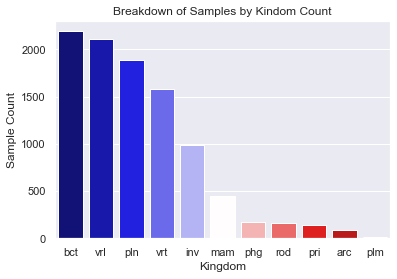

In [13]:
# Visualize the value_counts as a bar plot

ax = sns.barplot(x = kingdom_counts.index,
                y = kingdom_counts,
                palette = 'seismic')
ax.set(xlabel = 'Kingdom',
      ylabel = 'Sample Count',
      title = 'Breakdown of Samples by Kindom Count')

### Number of codons

How long are the sequences of each organism, what does this distribution look like?

In [17]:
data.describe()

,Unnamed: 0,DNAtype,SpeciesID,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,9771.000000,9771.00000,9771.000000,9.771000e+03,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,...,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000
mean,6544.025586,0.36680,130704.889162,7.794644e+04,0.020488,0.014074,0.017891,0.018362,0.019311,0.018388,...,0.005453,0.009839,0.006423,0.024092,0.021134,0.028183,0.021588,0.001642,0.000598,0.006254
std,3770.004099,0.67226,124893.476053,6.969568e+05,0.020461,0.009271,0.010595,0.014588,0.024510,0.016421,...,0.006657,0.008555,0.006407,0.013895,0.012999,0.014241,0.014945,0.001815,0.000939,0.010398
min,0.000000,0.00000,7.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3274.000000,0.00000,28946.500000,1.610000e+03,0.005610,0.007030,0.010960,0.007830,0.005380,0.007220,...,0.001200,0.001655,0.001140,0.012260,0.011880,0.017340,0.009650,0.000560,0.000000,0.000410
50%,6548.000000,0.00000,82116.000000,2.948000e+03,0.015290,0.013300,0.016130,0.014620,0.009780,0.012840,...,0.003520,0.009120,0.004530,0.025260,0.019020,0.026010,0.020560,0.001380,0.000420,0.001150
75%,9832.500000,1.00000,223280.500000,9.344000e+03,0.029290,0.019800,0.022855,0.025280,0.017475,0.024280,...,0.007080,0.015850,0.010295,0.034130,0.027690,0.036590,0.030940,0.002370,0.000830,0.002950
max,13027.000000,12.00000,463521.000000,4.066258e+07,0.141810,0.101190,0.089780,0.098470,0.160080,0.107370,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.120510,0.158550,0.044760,0.025610,0.106700


[(0.0, 150.0)]

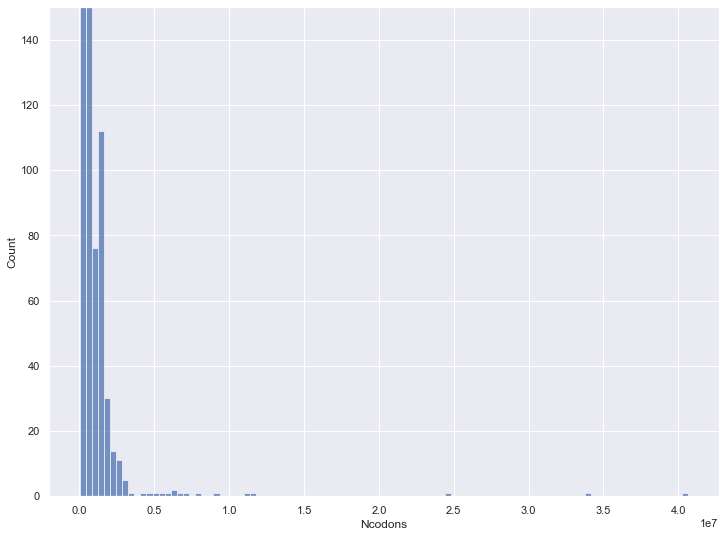

In [28]:
# Create a histogram showing the distribution of the number of codons in each sample
ax = sns.histplot(x = data['Ncodons'],
                bins = 100)
ax.set(ylim = (0, 150))

From the above figure, it is clear that the dataset is highly right-skewed.  Let's normalize it by log-scaling the data.

In [30]:
# Log-scale the Ncodons column
data['logNcodons'] = np.log(data['Ncodons'])

[(0.0, 400.0)]

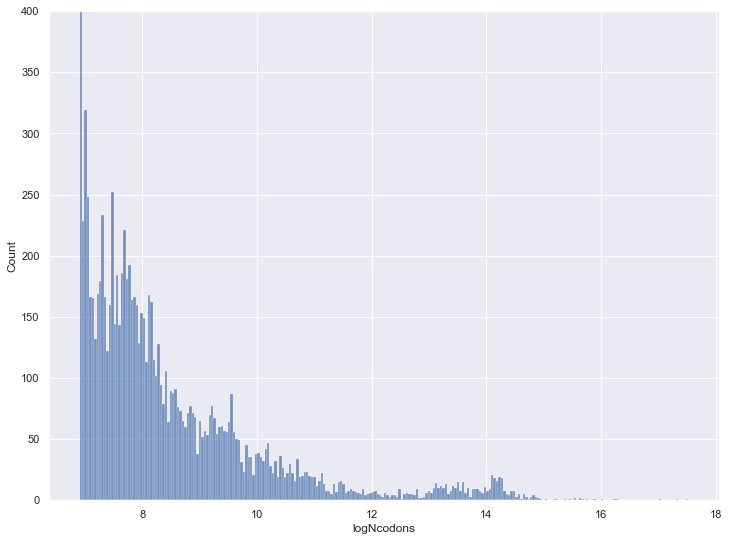

It is clear that there is still a significant skew to the data.  Let's compare the skewedness of the raw data to the log-transform.

In [42]:
print(f'The skewedness of the raw data is {data["Ncodons"].skew()}')
print(f'The skewedness of the log-transformed data is {data["logNcodons"].skew()}')

The skewedness of the raw data is 38.64520763612369
The skewedness of the log-transformed data is 1.8126322765268015


[(0.0, 150.0)]

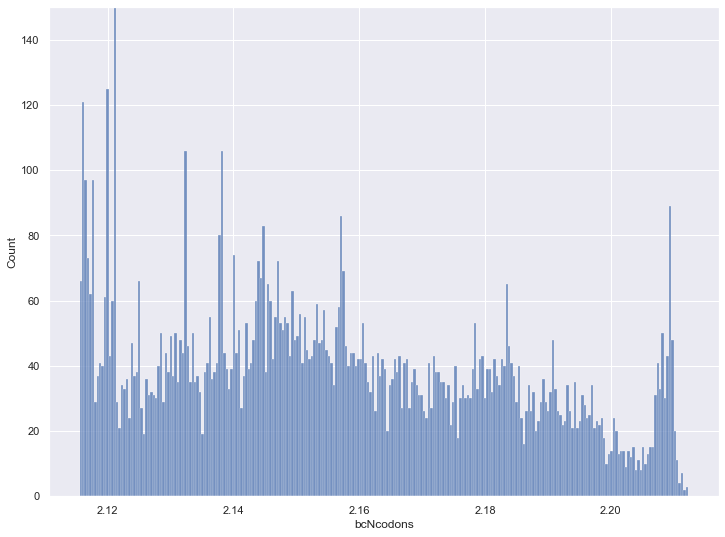

In [49]:
# Create a new histogram using the data resulting from a box-cox transformation

data['bcNcodons'] = stats.boxcox(data['Ncodons'])[0]
ax = sns.histplot(x = data['bcNcodons'],
                bins = 250)
ax.set(ylim = (0, 150))

### How does the number of codons vary by kingdom?

I want to see how effective retaining the number of codons as a feature will be at classifying a sample.

In [58]:
king_codon = data[['Ncodons','DNAtype','Kingdom']].groupby(by = ['Kingdom', 'DNAtype']).median()
king_codon

Ncodons
Kingdom DNAtype          
arc     0         12102.0
bct     0          7019.0
        4          1728.0
        6          4448.0
inv     0          3471.5
        1          2959.0
        2          6158.0
        4          1318.5
        11         7344.0
        12         2179.0
mam     0          2438.0
        1          2741.0
phg     0          2356.0
plm     0         16417.5
pln     0          3298.5
        1          5720.0
        2          1286.0
        3         38694.0
        4          1128.5
        5        102088.0
        7          1188.0
        9          1032.0
pri     0          2282.0
        1          2609.0
rod     0          3267.5
        1          1664.5
vrl     0          2876.0
vrt     0          2882.0
        1          2087.0